In [1]:
import pandas
import datetime
import os
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [2]:
tecMinCutoff = 10.
delTecCutoff = 0.
delMlatCutoff = 0.

In [3]:
baseDir = "/home/bharat/Documents/code/data/trghBnds/"

colNames = [ "mlatEqu", "tecEqu", "mlon",\
            "mlatPol", "tecPol", "date",\
            "mlatMin", "tecMin", "mlt", "mlonAdjst" ]
frames = []
# cnt = 0
for root, dirs, files in os.walk(baseDir):
    for fNum, fName in enumerate(files):
        currInpLosFile = root + fName
        bndDF = pandas.read_csv(currInpLosFile, delim_whitespace=True,\
                                    header=None, names=colNames,\
                                infer_datetime_format=True,\
                                parse_dates=["date"])
        frames.append( bndDF )

finBndDF = pandas.concat( frames )
finBndDF["normMLT"] = [x-24 if x >= 12 else x\
                         for x in finBndDF['mlt']]
finBndDF["delTecEqu"] = finBndDF["tecEqu"] - finBndDF["tecMin"]
finBndDF["delTecPol"] = finBndDF["tecPol"] - finBndDF["tecMin"]
finBndDF["delMlat"] = finBndDF["mlatPol"] - finBndDF["mlatEqu"]
finBndDF["timeStr"] = finBndDF["date"].dt.strftime('%H%M').astype(int)
# # discard dates where delTecEqu and delTecPol are -ve
# finBndDF["dateStr"] = finBndDF["date"].dt.strftime('%Y%m%d')
discrdDatesDelTec = finBndDF[ (finBndDF["delTecEqu"] < delTecCutoff) |\
                   (finBndDF["delTecPol"] < delTecCutoff) ]["date"].values
finBndDF = finBndDF[ ~finBndDF["date"].isin(discrdDatesDelTec) ].reset_index(drop=True)
# Discard those dates where tecMin is greater than 10.
discrdDatestecMin = finBndDF[ (finBndDF["tecMin"] > tecMinCutoff) ]["date"].values
finBndDF = finBndDF[ ~finBndDF["date"].isin(discrdDatestecMin) ].reset_index(drop=True)
# Discard locations where delMlat < 0.
finBndDF = finBndDF[ finBndDF["delMlat"] > 0. ].reset_index(drop=True)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


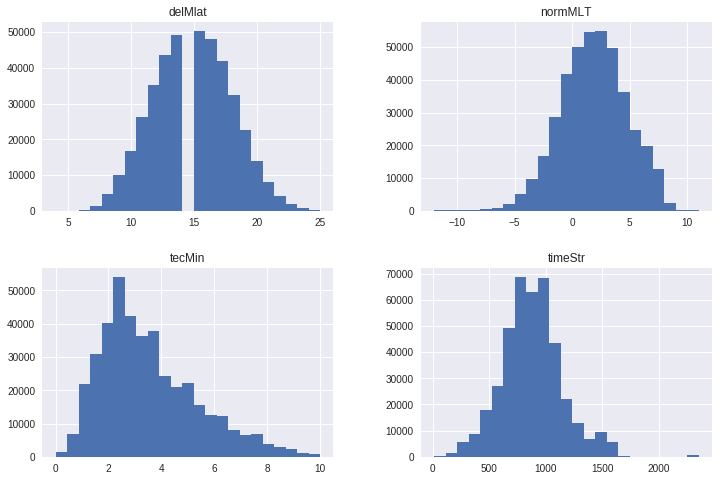

In [4]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
finBndDF.hist(["normMLT", "tecMin", "delMlat", "timeStr"], bins=23, ax=ax)
f.savefig( "../figs/hist-plots.pdf",bbox_inches='tight' )

In [5]:
finBndDF.shape
asyDF = pandas.read_csv( "../data/Asy_processed.txt", sep=' ' )
asyDF["date"] = pandas.to_datetime(asyDF["datetimeStr"], format='%Y%m%d-%H-%M')
finBndDF = pandas.merge( finBndDF, asyDF, on="date", how="inner" )
finBndDF.head()

,mlatEqu,tecEqu,mlon,mlatPol,tecPol,date,mlatMin,tecMin,mlt,mlonAdjst,normMLT,delTecEqu,delTecPol,delMlat,timeStr,datetimeStr,AsyD,AsyH,SymD,SymH
0,46.0,5.7,314.0,64.0,4.2,2011-04-18 07:15:00,55.0,3.2,23.0,-46.0,-1.0,2.5,1.0,18.0,715,20110418-07-15,25.0,17.0,0.0,36.0
1,48.0,6.7,318.0,64.0,4.4,2011-04-18 07:15:00,56.0,4.0,24.0,-42.0,0.0,2.7,0.4,16.0,715,20110418-07-15,25.0,17.0,0.0,36.0
2,51.0,6.4,326.0,66.0,6.8,2011-04-18 07:15:00,59.0,3.1,0.0,-34.0,0.0,3.3,3.7,15.0,715,20110418-07-15,25.0,17.0,0.0,36.0
3,50.0,5.6,328.0,67.0,5.4,2011-04-18 07:15:00,59.0,4.8,0.0,-32.0,0.0,0.8,0.6,17.0,715,20110418-07-15,25.0,17.0,0.0,36.0
4,48.0,8.0,334.0,67.0,5.9,2011-04-18 07:15:00,59.0,5.8,1.0,-26.0,1.0,2.2,0.1,19.0,715,20110418-07-15,25.0,17.0,0.0,36.0


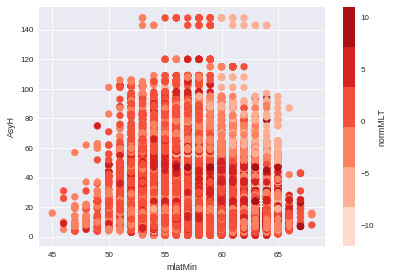

In [9]:
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Reds"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
finBndDF.plot( kind='scatter',
              x='mlatMin',
              y='AsyH',
              c='normMLT',
              s=50, cmap=seaMap, ax=ax)

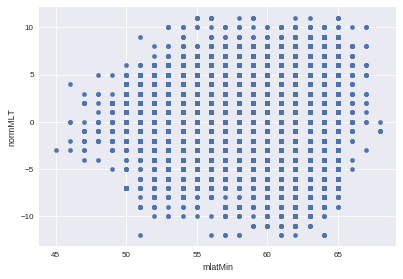

In [8]:
finBndDF.plot(x="mlatMin",y="normMLT", kind="scatter")